<a href="https://colab.research.google.com/github/SyedUsama12/Deep-Learning1/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction::
Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

Problem Statement::
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

WORKFLOW ::
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [63]:
import numpy as np 
import pandas as pd 

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [66]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
data.shape

(205, 26)

In [28]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
data.drop(columns='car_ID', inplace=True)
data.drop(columns='CarName', inplace=True)
data.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data["fueltype"]=labelencoder.fit_transform(data["fueltype"])
data["aspiration"]=labelencoder.fit_transform(data["aspiration"])
data["carbody"]=labelencoder.fit_transform(data["carbody"])
data["drivewheel"]=labelencoder.fit_transform(data["drivewheel"])
data["enginetype"]=labelencoder.fit_transform(data["enginetype"])
data["cylindernumber"]=labelencoder.fit_transform(data["cylindernumber"])
data["enginelocation"]=labelencoder.fit_transform(data["enginelocation"])
data["doornumber"]=labelencoder.fit_transform(data["doornumber"])
data["fuelsystem"]=labelencoder.fit_transform(data["fuelsystem"])



In [35]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
#mean = data[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]].mean(axis=0)
#data[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]] -= mean
#std = data[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]].std(axis=0)
#data[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]] /= std
#data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0,2,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,13495.0
1,2,3,3,1,0,1,0,2,0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0,2,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,16500.0
2,3,1,1,1,0,1,2,2,0,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,5,3,0.602571,5,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,16500.0
3,4,2,4,1,0,0,3,1,0,0.173274,0.206750,0.136209,0.235366,-0.419770,3,2,-0.430023,5,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,13950.0
4,5,2,5,1,0,0,3,0,0,0.106848,0.206750,0.229440,0.235366,0.515545,3,1,0.218350,5,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,17450.0


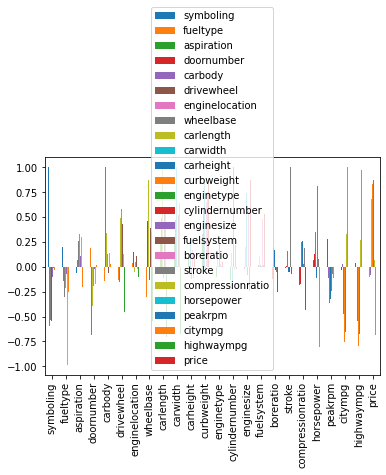

In [37]:
a =data.corr()
import matplotlib.pyplot as plt

a.plot(kind="bar")

In [38]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
X = data.loc[:,"symboling":"highwaympg"]

In [40]:
Y=data["price"]

In [41]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [42]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [43]:
data.shape

(205, 24)

In [45]:
X_train=data[:104]
Y_train=data[:104]
X_test=data[104:165]
Y_test = Y[104:165]
X_val = data[165:]
Y_val = Y[165:]

In [46]:
mean = X_train.iloc[: , 0:14].mean(axis=0)
X_train.iloc[: , 0:14] -= mean
std = X_train.iloc[:, 0:14].std(axis=0)
X_train.iloc[: , 0:14] /= std 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [49]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.911077,0.267341,-0.424346,0.957613,-3.238607,1.466323,NaN,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,-3.115126,-0.137801,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.911077,0.267341,-0.424346,0.957613,-3.238607,1.466323,NaN,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,-3.115126,-0.137801,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.062221,0.267341,-0.424346,0.957613,-0.696606,1.466323,NaN,-0.572621,-0.065953,-0.109996,-0.326516,0.532163,1.808478,0.817618,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.986649,0.267341,-0.424346,-1.034222,0.574395,-0.566978,NaN,0.277672,0.328084,0.173965,0.486073,-0.272193,-0.160964,-0.137801,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.986649,0.267341,-0.424346,-1.034222,0.574395,-2.600279,NaN,0.213499,0.328084,0.255097,0.486073,0.533819,-0.160964,-1.093219,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
X_train.drop(columns="enginelocation",inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
X_train

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.911077,0.267341,-0.424346,0.957613,-3.238607,1.466323,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,-3.115126,-0.137801,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.911077,0.267341,-0.424346,0.957613,-3.238607,1.466323,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,-3.115126,-0.137801,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.062221,0.267341,-0.424346,0.957613,-0.696606,1.466323,-0.572621,-0.065953,-0.109996,-0.326516,0.532163,1.808478,0.817618,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.986649,0.267341,-0.424346,-1.034222,0.574395,-0.566978,0.277672,0.328084,0.173965,0.486073,-0.272193,-0.160964,-0.137801,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.986649,0.267341,-0.424346,-1.034222,0.574395,-2.600279,0.213499,0.328084,0.255097,0.486073,0.533819,-0.160964,-1.093219,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-0.862207,0.267341,-0.424346,-1.034222,-0.696606,-0.566978,-0.139453,0.094580,-0.231694,0.657145,-0.293708,-0.160964,-0.137801,120,1,3.33,3.47,8.5,97,5200,27,34,8949.0
100,-0.862207,0.267341,-0.424346,-1.034222,0.574395,-0.566978,-0.139453,0.094580,-0.231694,0.657145,-0.330120,-0.160964,-0.137801,120,1,3.33,3.47,8.5,97,5200,27,34,9549.0
101,-0.862207,0.267341,-0.424346,-1.034222,0.574395,-0.566978,0.373932,0.700230,0.295663,0.828216,0.982338,1.808478,0.817618,181,5,3.43,3.27,9.0,152,5200,17,22,13499.0
102,-0.862207,0.267341,-0.424346,-1.034222,1.845395,-0.566978,0.373932,0.911842,0.295663,1.255895,1.315004,1.808478,0.817618,181,5,3.43,3.27,9.0,152,5200,17,22,14399.0


In [58]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [60]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
104,1.801430,0.357078,-0.516133,1.320480,-0.804256,1.161034,-0.225558,-1.120050,-0.296817,1.079370,-1.583894,1.085775,1.968289,2.319489,181,5,3.43,3.27,9.0,160,5200,19,25,17199.0
105,1.801430,0.357078,1.905722,1.320480,-0.804256,1.161034,-0.225558,-1.120050,-0.296817,1.079370,-1.583894,1.235636,1.968289,2.319489,181,5,3.43,3.27,7.8,200,5200,17,23,19699.0
106,0.084442,0.357078,-0.516133,1.320480,-0.804256,1.161034,-0.225558,0.141643,0.388079,1.079370,-1.583894,1.235636,1.968289,2.319489,181,5,3.43,3.27,9.0,160,5200,19,25,18399.0
107,-0.774052,0.357078,-0.516133,-0.744886,0.310735,1.161034,-0.225558,1.531102,1.108097,1.335563,0.928449,0.973378,-1.033352,-0.162771,120,5,3.46,3.19,8.4,97,5000,19,24,11900.0
108,-0.774052,-2.754600,1.905722,-0.744886,0.310735,1.161034,-0.225558,1.531102,1.108097,1.335563,0.928449,1.363459,-1.033352,-0.162771,152,3,3.70,3.52,21.0,95,4150,28,33,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-0.774052,0.357078,-0.516133,-0.744886,0.310735,-0.378598,-0.225558,-0.417335,-0.683168,-0.713980,-0.399504,-1.067385,-0.032805,-0.162771,98,1,3.19,3.03,9.0,70,4800,38,47,7738.0
161,-0.774052,0.357078,-0.516133,-0.744886,-0.804256,-0.378598,-0.225558,-0.417335,-0.683168,-0.713980,-0.471285,-1.005677,-0.032805,-0.162771,98,1,3.19,3.03,9.0,70,4800,28,34,8358.0
162,-0.774052,0.357078,-0.516133,-0.744886,0.310735,-0.378598,-0.225558,-0.417335,-0.683168,-0.713980,-0.471285,-0.966008,-0.032805,-0.162771,98,1,3.19,3.03,9.0,70,4800,28,34,9258.0
163,0.084442,0.357078,-0.516133,1.320480,0.310735,1.161034,-0.225558,-0.608985,-0.472431,-0.918934,-0.543066,-0.902096,-0.032805,-0.162771,98,1,3.19,3.03,9.0,70,4800,29,34,8058.0


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [71]:
network = Sequential()


In [82]:
network.add(layers.Dense(12, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_train)))
network.add(layers.Dense(8,activation="relu",kernel_regularizer=regularizers.l2(0.02)))
network.add(layers.Dense(6,activation="relu",kernel_regularizer=regularizers.l2(0.002)))

network.add(layers.Dense(1))

In [83]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [84]:
history = network.fit(X_train,Y_train, batch_size=16, verbose=0, epochs=200, validation_data=(X_val, Y_val))


ValueError: ignored

In [78]:
X_train.shape[1]

23